In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# Reading first csv file
SP = pd.read_csv('SP500.csv');  SP['pct'] = SP['Adj Close'].pct_change()  
SP = SP.set_index(pd.DatetimeIndex(SP['Date'].values))

SP

,Date,Open,High,Low,Close,Adj Close,Volume,pct
2018-12-07,2018-12-07,2691.260010,2708.540039,2623.139893,2633.080078,2633.080078,4216690000,NaN
2018-12-10,2018-12-10,2630.860107,2647.510010,2583.229980,2637.719971,2637.719971,4151030000,0.001762
2018-12-11,2018-12-11,2664.439941,2674.350098,2621.300049,2636.780029,2636.780029,3905870000,-0.000356
2018-12-12,2018-12-12,2658.229980,2685.439941,2650.260010,2651.070068,2651.070068,3958890000,0.005420
2018-12-13,2018-12-13,2658.699951,2670.189941,2637.270020,2650.540039,2650.540039,3927720000,-0.000200
...,...,...,...,...,...,...,...,...
2020-11-09,2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,3550.500000,8556610000,0.011700
2020-11-10,2020-11-10,3543.260010,3557.219971,3511.909912,3545.530029,3545.530029,6024230000,-0.001400
2020-11-11,2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000,0.007652
2020-11-12,2020-11-12,3562.669922,3569.020020,3518.580078,3537.010010,3537.010010,4890120000,-0.009979


Text(0, 0.5, 'Close Price')

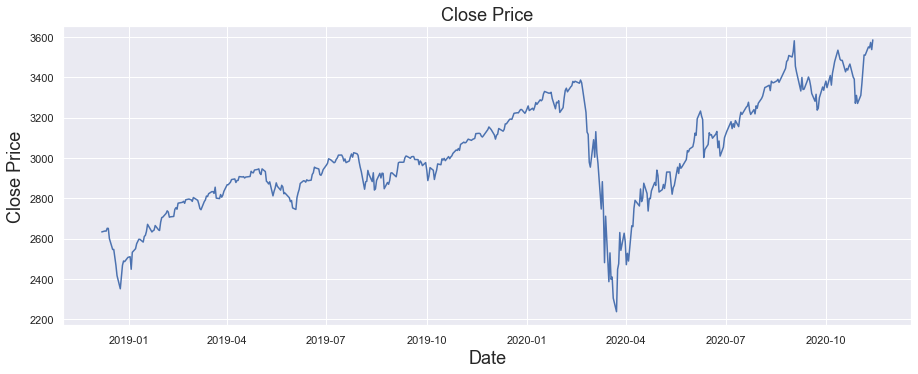

In [3]:
#plotting first csv stock data
plt.figure(figsize=(15.2, 5.5))
plt.title('Close Price', fontsize=18)
plt.plot(SP['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
#SP["Close"].plot()

In [4]:
# Reading 2nd csv file
MRNA = pd.read_csv('MRNA.csv'); MRNA['pct'] = MRNA['Adj Close'].pct_change()
MRNA = MRNA.set_index(pd.DatetimeIndex(MRNA['Date'].values))
MRNA

,Date,Open,High,Low,Close,Adj Close,Volume,pct
2018-12-07,2018-12-07,22.000000,22.750000,18.510000,18.600000,18.600000,12995600,NaN
2018-12-10,2018-12-10,18.900000,19.438999,18.000000,18.799999,18.799999,4233300,0.010753
2018-12-11,2018-12-11,20.549999,20.660000,17.990000,18.010000,18.010000,3435300,-0.042021
2018-12-12,2018-12-12,18.549999,19.480000,18.020000,18.680000,18.680000,2590700,0.037202
2018-12-13,2018-12-13,19.250000,19.290001,18.680000,18.760000,18.760000,1608600,0.004283
...,...,...,...,...,...,...,...,...
2020-11-09,2020-11-09,77.750000,80.250000,75.419998,77.739998,77.739998,20266800,0.073016
2020-11-10,2020-11-10,80.000000,80.379997,73.519997,76.050003,76.050003,10499400,-0.021739
2020-11-11,2020-11-11,77.050003,83.980003,76.129997,82.440002,82.440002,18576500,0.084024
2020-11-12,2020-11-12,85.180000,87.930000,83.830002,87.809998,87.809998,21700100,0.065138


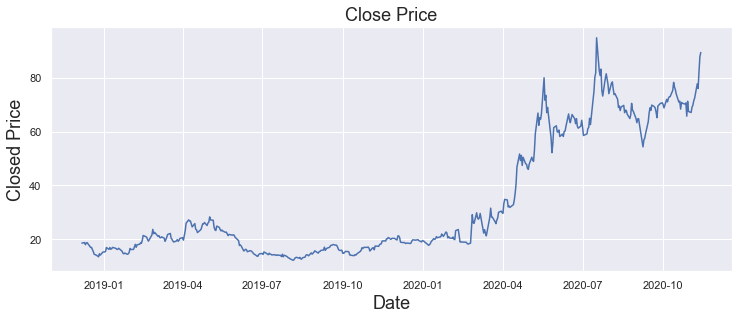

In [5]:
# Plotting 2nd stock data

plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(MRNA['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed Price', fontsize = 18)
plt.show()
#MRNA["Close"].plot()

In [6]:
#Calculate moving averages of SP
shortEMA = SP.Close.ewm(span = 5, adjust = False).mean()

<AxesSubplot:title={'center':'Close Price'}, xlabel='Date', ylabel='Close Price'>

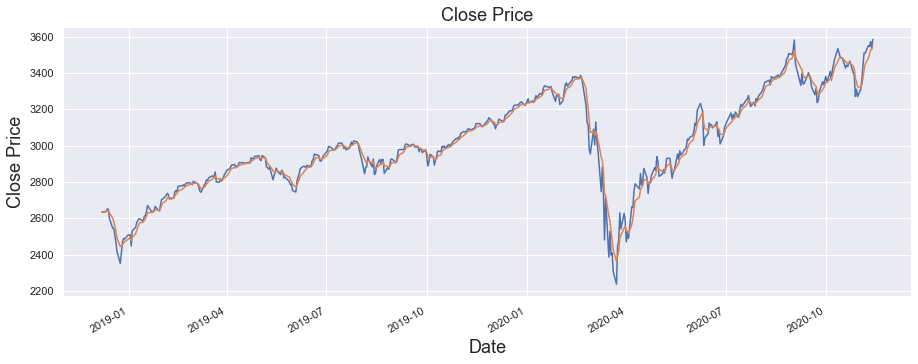

In [7]:
# avg price and close price of SP on single plot
plt.figure(figsize=(15.2, 5.5))
plt.title('Close Price', fontsize=18)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
SP["Close"].plot()
shortEMA.plot()

In [8]:
#Calculate moving averages of MRNA 
smrna = MRNA.Close.ewm(span = 5, adjust = False).mean()

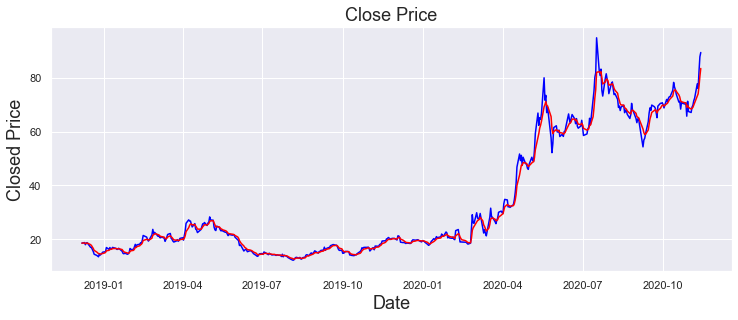

In [9]:
# avg price and close price of MRNA on single plot
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(MRNA['Close'], label = 'Close Price', color = 'blue')
plt.plot(smrna, label = 'avg price', color = 'red')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed Price', fontsize = 18)
plt.show()

In [10]:
sp = SP['pct'].to_numpy(); sp = np.delete(sp,0)
mrna = MRNA['pct'].to_numpy(); mrna = np.delete(mrna,0)

beta =  0.21612297418791368
Corr Factor =  0.07107593583592978


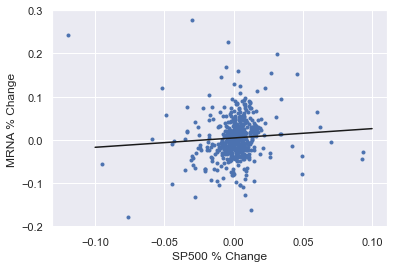

In [11]:
# Calculate correlation factor between SP and MRNA

plt.plot(sp, mrna, '.')
plt.grid(True)
plt.xlabel('SP500 % Change')
plt.ylabel('MRNA % Change')

slope, intercept, r_value, p_value, std_err = linregress(sp, mrna)
x = np.linspace(-.1, .1)
plt.plot(x, slope * x + intercept, 'k')
print('beta = ', slope)
print('Corr Factor = ', r_value)

In [12]:
# Printing correlation factor
corr_factor = r_value
print (corr_factor)

0.07107593583592978


In [13]:
# Adding average price of MRNA to MRNA dataFrame
MRNA['avg_price'] = smrna
MRNA

,Date,Open,High,Low,Close,Adj Close,Volume,pct,avg_price
2018-12-07,2018-12-07,22.000000,22.750000,18.510000,18.600000,18.600000,12995600,NaN,18.600000
2018-12-10,2018-12-10,18.900000,19.438999,18.000000,18.799999,18.799999,4233300,0.010753,18.666666
2018-12-11,2018-12-11,20.549999,20.660000,17.990000,18.010000,18.010000,3435300,-0.042021,18.447778
2018-12-12,2018-12-12,18.549999,19.480000,18.020000,18.680000,18.680000,2590700,0.037202,18.525185
2018-12-13,2018-12-13,19.250000,19.290001,18.680000,18.760000,18.760000,1608600,0.004283,18.603457
...,...,...,...,...,...,...,...,...,...
2020-11-09,2020-11-09,77.750000,80.250000,75.419998,77.739998,77.739998,20266800,0.073016,73.051443
2020-11-10,2020-11-10,80.000000,80.379997,73.519997,76.050003,76.050003,10499400,-0.021739,74.050963
2020-11-11,2020-11-11,77.050003,83.980003,76.129997,82.440002,82.440002,18576500,0.084024,76.847309
2020-11-12,2020-11-12,85.180000,87.930000,83.830002,87.809998,87.809998,21700100,0.065138,80.501539


In [14]:
# function to get time of buy and sell of stock

def BS_func(dt1, dt2):
    
    buy_list = []
    sell_list = []
    flag_buy = 0
    flag_sell = 0
    
    for i in range(0, len(dt1)):
        if corr_factor > 0: 
            if dt2['Close'][i] > dt2['avg_price'][i] and flag_buy == 0:
                buy_list.append(dt1['Close'][i])
                sell_list.append(0)
                flag_buy = 1
                flag_sell = 0
            elif dt2['Close'][i] < dt2['avg_price'][i] and flag_sell == 0:
                sell_list.append(dt1['Close'][i])
                buy_list.append(0)
                flag_buy = 0
                flag_sell = 1
            else:
                buy_list.append(0)
                sell_list.append(0)
        else:
            if dt2['Close'][i] < dt2['avg_price'][i] and flag_buy == 0:
                buy_list.append(dt1['Close'][i])
                sell_list.append(0)
                flag_buy = 1
                flag_sell = 0
            elif dt2['Close'][i] > dt2['avg_price'][i] and flag_sell == 0:
                sell_list.append(dt1['Close'][i])
                buy_list.append(0)
                flag_buy = 0
                flag_sell = 1
            else:
                buy_list.append(0)
                sell_list.append(0)
                     
    return (buy_list, sell_list)
        

In [15]:
# Adding buy and sell at each date to SP dataFrame
SP['Buy'] = BS_func(SP, MRNA)[0]
SP['Sell'] = BS_func(SP, MRNA)[1]
SP


,Date,Open,High,Low,Close,Adj Close,Volume,pct,Buy,Sell
2018-12-07,2018-12-07,2691.260010,2708.540039,2623.139893,2633.080078,2633.080078,4216690000,NaN,0.000000,0.000000
2018-12-10,2018-12-10,2630.860107,2647.510010,2583.229980,2637.719971,2637.719971,4151030000,0.001762,2637.719971,0.000000
2018-12-11,2018-12-11,2664.439941,2674.350098,2621.300049,2636.780029,2636.780029,3905870000,-0.000356,0.000000,2636.780029
2018-12-12,2018-12-12,2658.229980,2685.439941,2650.260010,2651.070068,2651.070068,3958890000,0.005420,2651.070068,0.000000
2018-12-13,2018-12-13,2658.699951,2670.189941,2637.270020,2650.540039,2650.540039,3927720000,-0.000200,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2020-11-09,2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,3550.500000,8556610000,0.011700,0.000000,0.000000
2020-11-10,2020-11-10,3543.260010,3557.219971,3511.909912,3545.530029,3545.530029,6024230000,-0.001400,0.000000,0.000000
2020-11-11,2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000,0.007652,0.000000,0.000000
2020-11-12,2020-11-12,3562.669922,3569.020020,3518.580078,3537.010010,3537.010010,4890120000,-0.009979,0.000000,0.000000


Text(0, 0.5, 'Close Price')

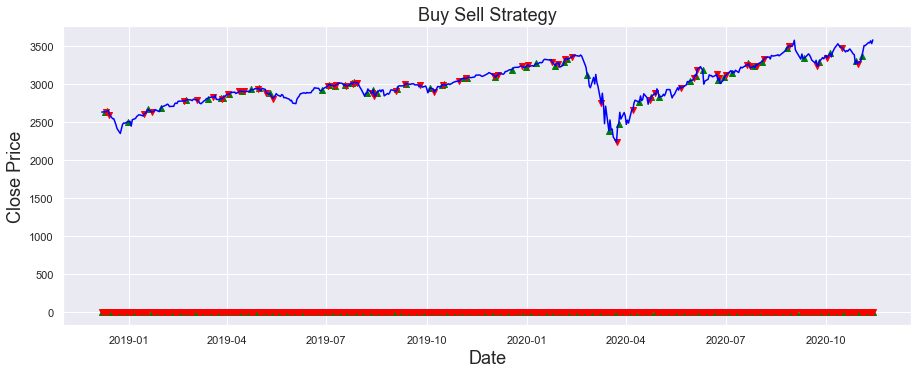

In [16]:
#Plot buy and sell data

plt.figure(figsize=(15.2, 5.5))
plt.title('Buy Sell Strategy', fontsize=18)
plt.plot(SP['Close'], label='Close Price', color='blue')
plt.scatter(SP.index, SP['Buy'], color = 'green', marker='^')
plt.scatter(SP.index, SP['Sell'], color = 'red', marker='v')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)